In [451]:
import pandas as pd

In [452]:
df = pd.read_csv("/kaggle/input/ml-engineer/ml-engineer-2023-08-31/train.csv")
df_test = pd.read_csv("/kaggle/input/ml-engineer/ml-engineer-2023-08-31/test.csv")
df.head()

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y
0,0,A 0,B0,C2,D1,100,E1,F2,237000
1,1,A1,B0,C11,D4,100,E4,F2,86193
2,2,A0,B0,C18,D0,0,E0,F2,169200
3,3,A2,B0,C11,D1,100,E1,F2,58000
4,4,A0,B0,C67,D1,0,E1,F2,235000


In [453]:
df['col_0'].unique()

array(['A 0', 'A1', 'A0', 'A2', 'AO', nan, ' A2   ', 'A0   ', 'A 1',
       ' A0   ', 'A3', 'A2   ', 'A 2', 'A1   ', 'A 3   ', ' A3   ',
       ' A1   ', 'A   3'], dtype=object)

In [454]:
df['col_1'].unique()

array(['B0', 'B 0', ' B0   ', nan, 'B0   ', 'B2', 'B3', 'BO', 'B1',
       'B   3', 'B1   '], dtype=object)

In [455]:
df['col_2'].unique()

array(['C2', 'C11', 'C18', 'C67', 'C4', 'C52', 'C7', 'C36', 'C57', 'C9',
       'C54', 'C41', 'C44', 'C15', 'C39', 'C40', 'C59', 'C27', 'C29',
       'C3', 'C49', 'C33', 'C6', 'C53', 'C12', 'C1', 'C56', 'C30', 'C81',
       'C26', 'C35', 'C22', 'C34', 'C58', 'C21', 'C47', 'C20', 'C28',
       'C50', 'C89', 'C62', 'C92', 'C38', 'C19', 'C0', 'C70', 'C87',
       'C69', 'C76', 'C48', 'C55', 'C85', 'C17', 'C25', 'C16', 'C63',
       'C13', 'C46', 'C37', 'C90', 'C86', 'C31', 'C71', 'C83', 'C45',
       'C61', 'C23', 'C88', 'C24', 'C51', 'C72', 'C65', 'C60', 'C64',
       'C82', 'C68', 'C79', 'C5', 'C10', 'C77', 'C42', 'C43', 'C75', 'C8',
       'C91', 'C80', 'C74', 'C14', 'C78', 'C66'], dtype=object)

In [456]:
df['col_3'].unique()

array(['D1', 'D4', 'D0', 'D8', 'D2', 'D41', 'D12', 'D6', 'D53', 'D48',
       'D66', 'D26', 'D42', 'D36', 'D68', 'D54', 'D9', 'D5', 'D55', 'D3',
       'D75', 'D21', 'D24', 'D40', 'D16', 'D39', 'D58', 'D71', 'D32',
       'D72', 'D15', 'D13', 'D31', 'D51', 'D76', 'D20', 'D22', 'D46',
       'D10', 'D29', 'D19', 'D56', 'D62', 'D7', 'D23', 'D34', 'D38',
       'D77', 'D64', 'D14', 'D60', 'D37', 'D44', 'D28', 'D45', 'D59',
       'D47', 'D11', 'D30', 'D18', 'D27', 'D49', 'D33', 'D57', 'D35',
       'D50', 'D65', 'D73'], dtype=object)

In [457]:
df['col_5'].unique()

array(['E1', 'E4', 'E0', 'E24', 'E2', 'E19', 'E11', 'E6', 'E52', 'E48',
       'E63', 'E36', 'E23', 'E40', 'E32', 'E38', 'E18', 'E69', 'E8',
       'E53', 'E3', 'E70', 'E5', 'E22', 'E45', 'E14', 'E35', 'E29', 'E67',
       'E13', 'E28', 'E51', 'E61', 'E17', 'E20', 'E47', 'E12', 'E9',
       'E49', 'E54', 'E60', 'E7', 'E21', 'E30', 'E34', 'E71', 'E64',
       'E59', 'E33', 'E56', 'E43', 'E27', 'E25', 'E15', 'E58', 'E57',
       'E46', 'E10', 'E16', 'E37', 'E26', 'E50', 'E42', 'E41', 'E44',
       'E31', 'E62'], dtype=object)

In [458]:
df['col_6'].unique()

array(['F2', 'F0', 'F1', nan, 'F2   ', 'F 2', 'F0   ', 'F 0', ' F0   ',
       'FO', ' F2   ', ' F1   ', 'F 1', 'F1   '], dtype=object)

### Data Pre processing

#### **Clean Data**

In [459]:
def clean_and_map(value):
    if pd.notna(value) and value.strip()[0]=='A':
        # Remove leading/trailing white spaces, make it lower case, and remove middle spaces
        cleaned_value = ''.join(value.strip().lower().split())

        # Define your mapping here
        value_mapping = {
            'a0': 'A0',
            'a1': 'A1',
            'a2': 'A2',
            'a3': 'A3',
            'ao': 'A0',  # Replace 'AO' with 'A0'
        }

        return value_mapping.get(cleaned_value, value)

    if pd.notna(value) and value.strip()[0]=='B':
        # Remove leading/trailing white spaces, make it lower case, and remove middle spaces
        cleaned_value = ''.join(value.strip().lower().split())

        # Define your mapping here
        value_mapping = {
            'b0': 'B0',
            'b1': 'B1',
            'b2': 'B2',
            'b3': 'B3',
            'bo': 'B0',  # Replace 'AO' with 'A0'
        }

        return value_mapping.get(cleaned_value, value)

    if pd.notna(value) and value.strip()[0]=='C':
        # Remove leading/trailing white spaces, make it lower case, and remove middle spaces
        cleaned_value = ''.join(value.strip().lower().split())

        # Define your mapping here
        value_mapping = {
            'c0': 'C0',
            'c1': 'C1',
            'c2': 'C2',
            'c3': 'C3',
            'co': 'C0',  # Replace 'AO' with 'A0'
        }

        return value_mapping.get(cleaned_value, value)

    if pd.notna(value) and value.strip()[0]=='D':
        # Remove leading/trailing white spaces, make it lower case, and remove middle spaces
        cleaned_value = ''.join(value.strip().lower().split())

        # Define your mapping here
        value_mapping = {
            'd0': 'D0',
            'd1': 'D1',
            'd2': 'D2',
            'd3': 'D3',
            'do': 'D0',  # Replace 'AO' with 'A0'
        }

        return value_mapping.get(cleaned_value, value)

    if pd.notna(value) and value.strip()[0]=='E':
        # Remove leading/trailing white spaces, middle spaces
        cleaned_value = ''.join(value.strip().lower().split())

        # Define your mapping here
        value_mapping = {
            'e0': 'E0',
            'e1': 'E1',
            'e2': 'E2',
            'e3': 'E3',
            'eo': 'E0',  # Replace 'AO' with 'A0'
        }

        
        return value_mapping.get(cleaned_value, value)

    if pd.notna(value) and value.strip()[0]=='F':

        # Remove leading/trailing white spaces, make it lower case, and remove middle spaces
        cleaned_value = ''.join(value.strip().lower().split())
        # print(cleaned_value)

        # Define your mapping here
        value_mapping = {
            'f0': 'F0',
            'f1': 'F1',
            'f2': 'F2',
            'f3': 'F3',
            'fo': 'F0',  # Replace 'AO' with 'A0'
        }

        
        return value_mapping.get(cleaned_value, value)

    # If the value is NaN, return it as is
    return value


In [460]:
df['col_0'] = df['col_0'].apply(clean_and_map)
df['col_1'] = df['col_1'].apply(clean_and_map)
df['col_2'] = df['col_2'].apply(clean_and_map)
df['col_3'] = df['col_3'].apply(clean_and_map)
df['col_5'] = df['col_5'].apply(clean_and_map)
df['col_6'] = df['col_6'].apply(clean_and_map)

In [461]:
df_test['col_0'] = df_test['col_0'].apply(clean_and_map)
df_test['col_1'] = df_test['col_1'].apply(clean_and_map)
df_test['col_2'] = df_test['col_2'].apply(clean_and_map)
df_test['col_3'] = df_test['col_3'].apply(clean_and_map)
df_test['col_5'] = df_test['col_5'].apply(clean_and_map)
df_test['col_6'] = df_test['col_6'].apply(clean_and_map)


In [462]:
df['col_0'].unique()

array(['A0', 'A1', 'A2', nan, 'A3'], dtype=object)

In [463]:
df['col_1'].unique()

array(['B0', nan, 'B2', 'B3', 'B1'], dtype=object)

In [464]:
df['col_2'].unique()

array(['C2', 'C11', 'C18', 'C67', 'C4', 'C52', 'C7', 'C36', 'C57', 'C9',
       'C54', 'C41', 'C44', 'C15', 'C39', 'C40', 'C59', 'C27', 'C29',
       'C3', 'C49', 'C33', 'C6', 'C53', 'C12', 'C1', 'C56', 'C30', 'C81',
       'C26', 'C35', 'C22', 'C34', 'C58', 'C21', 'C47', 'C20', 'C28',
       'C50', 'C89', 'C62', 'C92', 'C38', 'C19', 'C0', 'C70', 'C87',
       'C69', 'C76', 'C48', 'C55', 'C85', 'C17', 'C25', 'C16', 'C63',
       'C13', 'C46', 'C37', 'C90', 'C86', 'C31', 'C71', 'C83', 'C45',
       'C61', 'C23', 'C88', 'C24', 'C51', 'C72', 'C65', 'C60', 'C64',
       'C82', 'C68', 'C79', 'C5', 'C10', 'C77', 'C42', 'C43', 'C75', 'C8',
       'C91', 'C80', 'C74', 'C14', 'C78', 'C66'], dtype=object)

In [465]:
df['col_3'].unique()

array(['D1', 'D4', 'D0', 'D8', 'D2', 'D41', 'D12', 'D6', 'D53', 'D48',
       'D66', 'D26', 'D42', 'D36', 'D68', 'D54', 'D9', 'D5', 'D55', 'D3',
       'D75', 'D21', 'D24', 'D40', 'D16', 'D39', 'D58', 'D71', 'D32',
       'D72', 'D15', 'D13', 'D31', 'D51', 'D76', 'D20', 'D22', 'D46',
       'D10', 'D29', 'D19', 'D56', 'D62', 'D7', 'D23', 'D34', 'D38',
       'D77', 'D64', 'D14', 'D60', 'D37', 'D44', 'D28', 'D45', 'D59',
       'D47', 'D11', 'D30', 'D18', 'D27', 'D49', 'D33', 'D57', 'D35',
       'D50', 'D65', 'D73'], dtype=object)

In [466]:
df['col_4'].unique()

array([100,   0,  50])

In [467]:
df['col_5'].unique()

array(['E1', 'E4', 'E0', 'E24', 'E2', 'E19', 'E11', 'E6', 'E52', 'E48',
       'E63', 'E36', 'E23', 'E40', 'E32', 'E38', 'E18', 'E69', 'E8',
       'E53', 'E3', 'E70', 'E5', 'E22', 'E45', 'E14', 'E35', 'E29', 'E67',
       'E13', 'E28', 'E51', 'E61', 'E17', 'E20', 'E47', 'E12', 'E9',
       'E49', 'E54', 'E60', 'E7', 'E21', 'E30', 'E34', 'E71', 'E64',
       'E59', 'E33', 'E56', 'E43', 'E27', 'E25', 'E15', 'E58', 'E57',
       'E46', 'E10', 'E16', 'E37', 'E26', 'E50', 'E42', 'E41', 'E44',
       'E31', 'E62'], dtype=object)

In [468]:
df['col_6'].unique()

array(['F2', 'F0', 'F1', nan], dtype=object)

#### **Handle Missing Values**

In [469]:
# Get the count of NaN values in each column
null_counts = df.isna().sum()

# Display the null value counts
print(null_counts)

UID        0
col_0    139
col_1     86
col_2      0
col_3      0
col_4      0
col_5      0
col_6    112
y          0
dtype: int64


In [470]:
# Get the count of NaN values in each column
null_counts = df_test.isna().sum()

# Display the null value counts
print(null_counts)

UID       0
col_0    67
col_1    34
col_2     0
col_3     0
col_4     0
col_5     0
col_6    48
dtype: int64


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     2628 non-null   int64 
 1   col_0   2489 non-null   object
 2   col_1   2542 non-null   object
 3   col_2   2628 non-null   object
 4   col_3   2628 non-null   object
 5   col_4   2628 non-null   int64 
 6   col_5   2628 non-null   object
 7   col_6   2516 non-null   object
 8   y       2628 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 184.9+ KB


In [472]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     1127 non-null   int64 
 1   col_0   1060 non-null   object
 2   col_1   1093 non-null   object
 3   col_2   1127 non-null   object
 4   col_3   1127 non-null   object
 5   col_4   1127 non-null   int64 
 6   col_5   1127 non-null   object
 7   col_6   1079 non-null   object
dtypes: int64(2), object(6)
memory usage: 70.6+ KB


In [473]:
# as we see col_0, col_1 and col_6 are of categorical types, we need to use mode to handle missing values
mode_value = df['col_0'].mode()[0]
df['col_0'].fillna(mode_value, inplace=True)
mode_value = df['col_1'].mode()[0]
df['col_1'].fillna(mode_value, inplace=True)
mode_value = df['col_6'].mode()[0]
df['col_6'].fillna(mode_value, inplace=True)

In [474]:
# as we see col_0, col_1 and col_6 are of categorical types, we need to use mode to handle missing values
mode_value = df_test['col_0'].mode()[0]
df_test['col_0'].fillna(mode_value, inplace=True)
mode_value = df_test['col_1'].mode()[0]
df_test['col_1'].fillna(mode_value, inplace=True)
mode_value = df_test['col_6'].mode()[0]
df_test['col_6'].fillna(mode_value, inplace=True)

#### **handling outliers**

In [475]:
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [476]:
import numpy as np
# Calculate Z-scores
z_scores = (df - np.mean(df)) / np.std(df)

# Define a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 2

# Identify outliers
outliers = np.where(np.abs(z_scores) > threshold)[0]

print("Outliers:", outliers)

Outliers: [  25   32   51   63   66   79   96  115  118  124  136  181  223  309
  312  352  368  383  394  436  466  578  635  636  653  671  680  749
  782  802  867  884  896  908  926  927  933 1000 1052 1075 1104 1105
 1135 1159 1183 1202 1209 1281 1283 1294 1394 1448 1457 1462 1492 1501
 1521 1535 1548 1564 1575 1584 1590 1640 1654 1713 1738 1740 1801 1803
 1807 1859 1884 1902 1904 1944 2024 2058 2065 2098 2178 2261 2266 2286
 2314 2394 2407 2417 2419 2479 2485 2529 2563 2569 2570 2601 2618 2625]


In [477]:
# Delete rows with outlier indices from the DataFrame
df = df.drop(outliers)

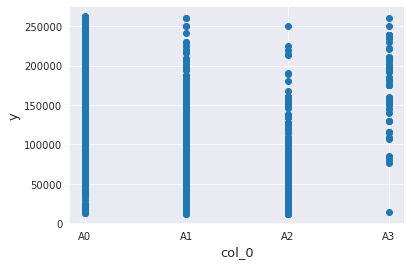

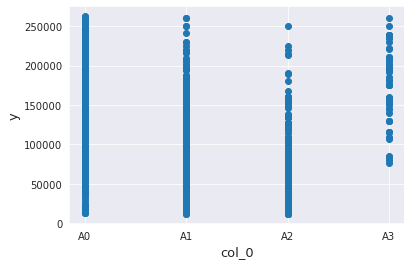

In [478]:
# check for outliers in col_0
fig, ax = plt.subplots()
ax.scatter(x = df['col_0'], y = df['y'])
plt.ylabel('y', fontsize=13)
plt.xlabel('col_0', fontsize=13)
plt.show()

# Deleting outliers
df = df.drop(df[(df['col_0']=='A3') & (df['y']<70000)].index)

# Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = df['col_0'], y = df['y'])
plt.ylabel('y', fontsize=13)
plt.xlabel('col_0', fontsize=13)
plt.show()

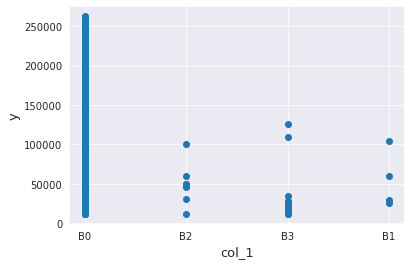

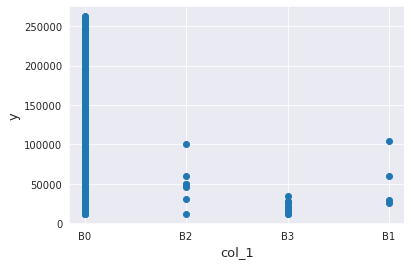

In [479]:
# check for outliers in col_1
fig, ax = plt.subplots()
ax.scatter(x = df['col_1'], y = df['y'])
plt.ylabel('y', fontsize=13)
plt.xlabel('col_1', fontsize=13)
plt.show()

# Deleting outliers
df = df.drop(df[(df['col_1']=='B3') & (df['y']>100000)].index)

# Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = df['col_1'], y = df['y'])
plt.ylabel('y', fontsize=13)
plt.xlabel('col_1', fontsize=13)
plt.show()

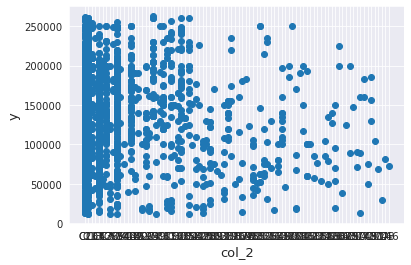

In [480]:
fig, ax = plt.subplots()
ax.scatter(x = df['col_2'], y = df['y'])
plt.ylabel('y', fontsize=13)
plt.xlabel('col_2', fontsize=13)
plt.show()

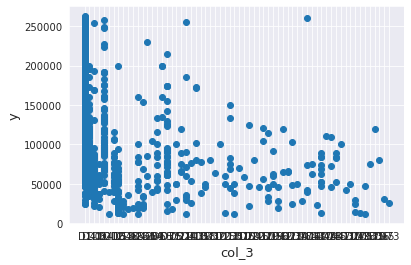

In [481]:
fig, ax = plt.subplots()
ax.scatter(x = df['col_3'], y = df['y'])
plt.ylabel('y', fontsize=13)
plt.xlabel('col_3', fontsize=13)
plt.show()

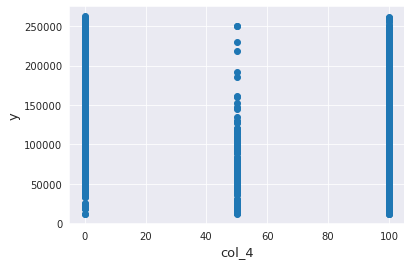

In [482]:
fig, ax = plt.subplots()
ax.scatter(x = df['col_4'], y = df['y'])
plt.ylabel('y', fontsize=13)
plt.xlabel('col_4', fontsize=13)
plt.show()

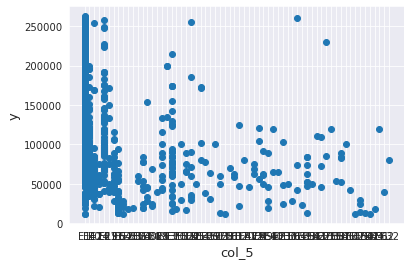

In [483]:
fig, ax = plt.subplots()
ax.scatter(x = df['col_5'], y = df['y'])
plt.ylabel('y', fontsize=13)
plt.xlabel('col_5', fontsize=13)
plt.show()

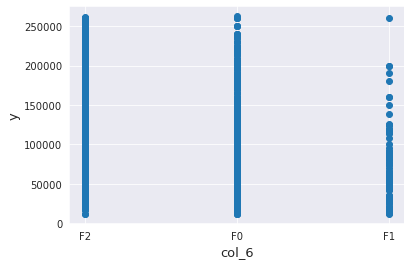

In [484]:
fig, ax = plt.subplots()
ax.scatter(x = df['col_6'], y = df['y'])
plt.ylabel('y', fontsize=13)
plt.xlabel('col_6', fontsize=13)
plt.show()

**we can see that there is less outliers to be removed in col_2, col_3, col_4, col_5, col_6**

#### **Define the features on which we want our model to be trained**

In [485]:
features = [
       'col_0',
       'col_1',
       'col_2',
       'col_3',
       'col_4',
       'col_5',
       'col_6'
      ]

In [486]:
X_train = df[features]
y_train = df['y']
X_test = df_test[features]

In [487]:
# Select categorical columns
categorical_cols = [cname for cname in X_train.columns if
              X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if
                X_train[cname].dtype in ['int64', 'float64']]

#### **Using ColumnTransformer**

In [488]:
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
encoder_1 = OrdinalEncoder()
encoder_2 =OneHotEncoder(handle_unknown='ignore')

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
     ('scaler', scaler),
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
     ('onehot', encoder_2),
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

#### **Define the model**

In [489]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1100, learning_rate=0.05)

#### **Create the Pipeline**

In [490]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                             ('under', RandomUnderSampler()),  # Undersample the majority class to balance
#                             ('over', RandomOverSampler()),   # Oversample the minority class to balance
                            ('model', model)
                          ])

# Preprocessing of training data, fit model 
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['col_4']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['col_0', 'col_1', 'col_2',
                                                   'col_3', 'col_5',
                                                   'col_6'])])),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=

#### **Predict on train data**

In [491]:
y_train_pred = pipeline.predict(X_train)

In [492]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Calculate the MAE for the training data
mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"Root Mean Squared Error (RMSE) on Training Data: {train_rmse}")
print(f"Mean Absolute Error on Training Data: {mae}")

Root Mean Squared Error (RMSE) on Training Data: 36779.59352254849
Mean Absolute Error on Training Data: 28011.298264678968


#### **Predict on test data**

In [493]:
# Preprocessing of validation data, get predictions
preds = pipeline.predict(X_test)

# print(preds)
# Save test predictions to file
output = pd.DataFrame({'UID': df_test.UID,
                       'y': preds})
output.to_csv('submission.csv', index=False)

In [494]:
df_res=pd.read_csv('/kaggle/working/submission.csv');
df_res

,UID,y
0,2628,155679.36
1,2629,150494.75
2,2630,155679.36
3,2631,187944.98
4,2632,155679.36
...,...,...
1122,3750,124865.42
1123,3751,207938.45
1124,3752,72522.88
1125,3753,160726.47
